In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import pathlib
#from mpl_toolkits import mplot3d

In [2]:
save_plots = False

In [3]:
## Create plots directory, if missing
plotsDirectory = (str(pathlib.Path.home())
                  + '/vertex-reconstruction-studies/'
                  + 'plots/'
                  + 'studies_on_davinci_parsed_logs/'
                  + 'event_topological_exploration/'
)
pathlib.Path(plotsDirectory).mkdir(parents=True, exist_ok=True)

# Import MC data

In [4]:
inputFile = '~/data/parsedDaVinciLog.h5'
df_events = pd.read_hdf(inputFile, key='LHCbMC_Lb')

# Helper functions

In [5]:
plot3DConfig = {
    'xlabel': '$x$ [mm]',
    'ylabel': '$y$ [mm]',
    'zlabel': '$z$ [mm]',
}

In [6]:
coordinateToComponent = {
    'x': 0,
    'y': 1,
    'z': 2
}

coordinateToLim = {
    'x': (-2000,2000),
    'y': (-2000,2000),
    'z': (0,9000)
}

In [7]:
def PlotEventPlane(eventIndex, xAxis, yAxis, tightAxes=False, showArrows=True):
    %matplotlib inline
    
    fig = plt.figure()
    ax = plt.axes()
    
    event = df_events.iloc[eventIndex]
    #totIterations=event['numberOfIterations']
    
    xComp = coordinateToComponent[xAxis]
    yComp = coordinateToComponent[yAxis]
    
    vertices = []
    protonRefPoints = []
    pionRefPoints = []
    
    vertices.append([event['seed_vtx'][xComp], event['seed_vtx'][yComp]])
    vertices += [[vtx[xComp], vtx[yComp]] for vtx in event['iter_currentVertices']]
    
    protonRefPoints.append([event['p_refPoint'][xComp], event['p_refPoint'][yComp]])
    protonRefPoints += [[refPoint[xComp], refPoint[yComp]] for refPoint in event['iter_p_refPoint']]
    
    pionRefPoints.append([event['pim_refPoint'][xComp], event['pim_refPoint'][yComp]])
    pionRefPoints += [[refPoint[xComp], refPoint[yComp]] for refPoint in event['iter_pim_refPoint']]
    
    ax.plot(*zip(*vertices),color='black',marker='x',linestyle='--',label='Vertex')
    ax.plot(*zip(*protonRefPoints),color='tab:red',marker='+',linestyle='-',label='Proton')
    ax.plot(*zip(*pionRefPoints),color='tab:blue',marker='+',linestyle='-',label='Pion')
    
    if showArrows:
        protonMomenta = []
        pionMomenta = []
        
        protonMomenta.append([event['p_momentum'][xComp], event['p_momentum'][yComp]])
        protonMomenta += [[mom[xComp], mom[yComp]] for mom in event['iter_p_momentum']]
        
        pionMomenta.append([event['pim_momentum'][xComp], event['pim_momentum'][yComp]])
        pionMomenta += [[mom[xComp], mom[yComp]] for mom in event['iter_pim_momentum']]
        
        ax.quiver(*zip(*protonRefPoints), *zip(*protonMomenta), color='tab:red')
        ax.quiver(*zip(*pionRefPoints), *zip(*pionMomenta), color='tab:blue')
        
    
    ax.set_xlabel(xAxis + " [mm]")
    ax.set_ylabel(yAxis + " [mm]")
    ax.grid()
    ax.set_title("Event " + str(eventIndex) + " (" + event['status'] + ")\n$" + xAxis + yAxis + "$ plane topology")
    
    if not tightAxes:
        ax.set_xlim(coordinateToLim[xAxis])
        ax.set_ylim(coordinateToLim[yAxis])
    ax.legend(loc='best')
    plt.show()

In [8]:
## TODO: add arrows
def PlotEvent3DPlane(eventIndex, interactive=False, tightAxes=False, showArrows=True):
    ## WARNING: very buggy
    if interactive:
        %matplotlib notebook
    else:
        %matplotlib inline
    
    fig = plt.figure()
    ax = plt.axes(projection='3d', **plot3DConfig)
    
    event = df_events.iloc[eventIndex]
    vertices = []
    protonRefPoints = []
    pionRefPoints = []

    vertices.append(event['seed_vtx'])
    vertices += [vtx for vtx in event['iter_currentVertices']]
    
    protonRefPoints.append(event['p_refPoint'])
    protonRefPoints += [refPoint for refPoint in event['iter_p_refPoint']]
    
    pionRefPoints.append(event['pim_refPoint'])
    pionRefPoints += [refPoint for refPoint in event['iter_pim_refPoint']]
    
    ax.plot3D(*zip(*vertices), color='black',marker='x',linestyle='--',label='Vertex')
    ax.plot3D(*zip(*protonRefPoints),color='tab:red',marker='+',linestyle='-',label='Proton')
    ax.plot3D(*zip(*pionRefPoints),color='tab:blue',marker='+',linestyle='-',label='Pion')
    
    ax.set_title("Event " + str(eventIndex) + " (" + event['status'] + ")")
    
    if not tightAxes:
        ax.set_xlim(coordinateToLim['x'])
        ax.set_ylim(coordinateToLim['y'])
        ax.set_zlim(coordinateToLim['z'])
    fig.legend()
    plt.show()

In [9]:
def PlotFullEventPlanes(index, tightAxes=False, showArrows=True):
    PlotEventPlane(index,'x','y', tightAxes=tightAxes, showArrows=showArrows)
    PlotEventPlane(index,'z','x', tightAxes=tightAxes, showArrows=showArrows)
    PlotEventPlane(index,'z','y', tightAxes=tightAxes, showArrows=showArrows)
    
    PlotEvent3DPlane(index, interactive=False, tightAxes=tightAxes, showArrows=showArrows)

# Study topology of events

Converged events:

In [10]:
df_events.loc[df_events['status'] == 'Converged'].index

Int64Index([    0,     1,     2,     3,     4,     6,     7,     8,    11,
               12,
            ...
            10425, 10426, 10427, 10428, 10429, 10431, 10432, 10433, 10434,
            10435],
           dtype='int64', length=8320)

Failed events:

In [11]:
df_events.loc[df_events['status'] == 'NonConverged'].index

Int64Index([    5,     9,    10,    21,    24,    30,    32,    35,    41,
               47,
            ...
            10382, 10383, 10384, 10385, 10400, 10411, 10413, 10419, 10423,
            10430],
           dtype='int64', length=2116)

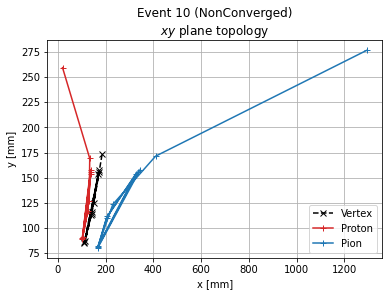

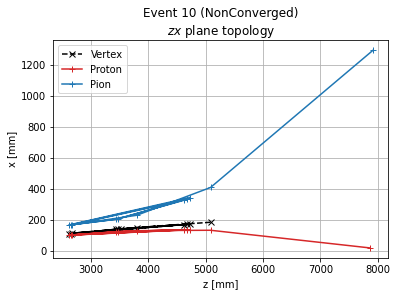

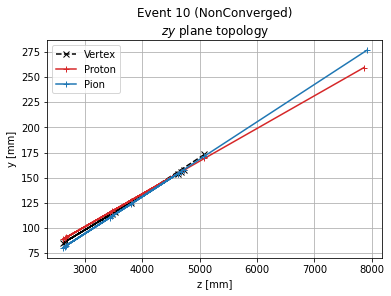

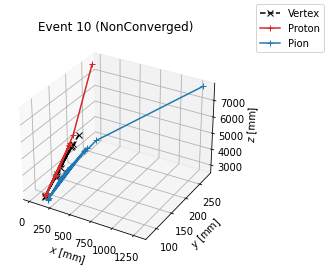

In [12]:
PlotFullEventPlanes(10, tightAxes=True, showArrows=False)